In [2]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
#Load data

df=pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [7]:
df.info()
#to check if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


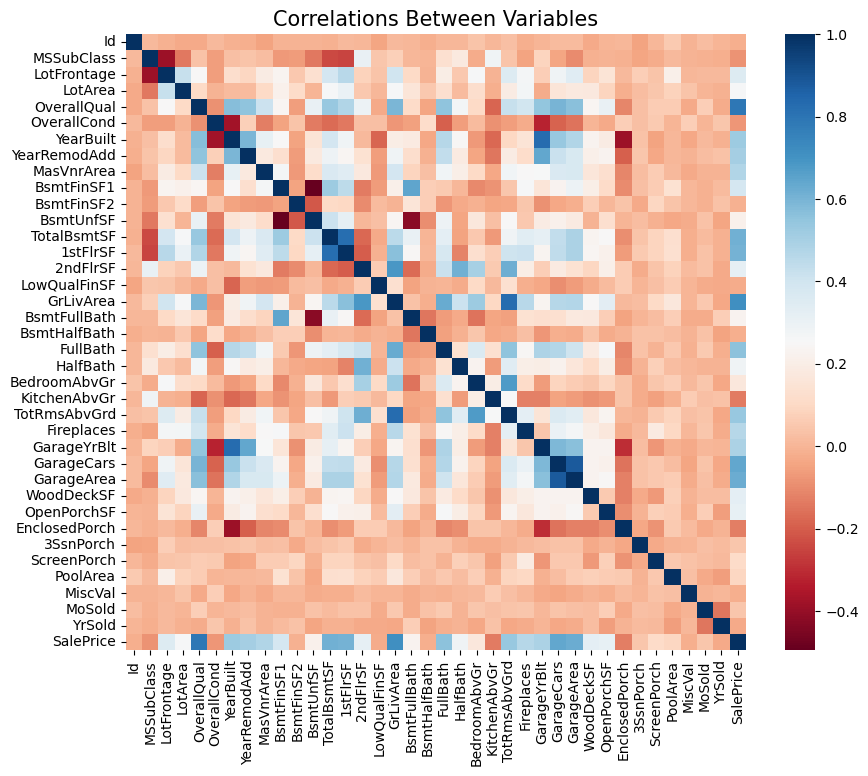

In [15]:
#To check the correlation between variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

$Feature Selection$

***We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.***

In [16]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [17]:
df.shape

(1460, 18)

In [19]:
df.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'MSZoning', 'Utilities', 'BldgType', 'Heating',
       'KitchenQual', 'SaleCondition', 'LandSlope'],
      dtype='object')

In [20]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


## Split Data into X and y

In [21]:
df.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'MSZoning', 'Utilities', 'BldgType', 'Heating',
       'KitchenQual', 'SaleCondition', 'LandSlope'],
      dtype='object')

In [22]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [24]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [25]:
#One hot encoding
X = pd.get_dummies(X, columns=cat_cols)

In [26]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0


In [27]:
#Standardizing data
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [28]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


**divide data into 4 parts  X_train,X_test,Y_train,Y_test**

In [30]:
# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


In [43]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Linear regression

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

predictions=LR.predict(X_test)

# ============================ Step-6: Metrics==================================================================

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(LR)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23567.890565943384
MSE: 1414931404.6297855
RMSE: 37615.573963848874
R2 Score: 0.8155317822983865
------------------------------
RMSE Cross-Validation: 37056.54350238647


## Lasso Regression

In [45]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23560.45808027236
MSE: 1414337628.5020964
RMSE: 37607.68044564962
R2 Score: 0.8156091944072917
------------------------------
RMSE Cross-Validation: 35922.769368760746


## Support Vector Machines

In [46]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17843.162280849738
MSE: 1132136370.3413308
RMSE: 33647.23421533085
R2 Score: 0.8524004925265741
------------------------------
RMSE Cross-Validation: 30745.475239075837


## Random Forest

In [47]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17795.728628506196
MSE: 911144884.4250662
RMSE: 30185.176567730497
R2 Score: 0.8812117164493839
------------------------------
RMSE Cross-Validation: 31487.322200113886


## Model comparison

In [49]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,37056.543502
1,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
2,SVR,17843.162281,1.132136e+09,33647.234215,0.852400,30745.475239
3,RandomForestRegressor,17795.728629,9.111449e+08,30185.176568,0.881212,31487.322200


In [50]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,SVR,17843.162281,1.132136e+09,33647.234215,0.852400,30745.475239
3,RandomForestRegressor,17795.728629,9.111449e+08,30185.176568,0.881212,31487.322200
1,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,37056.543502


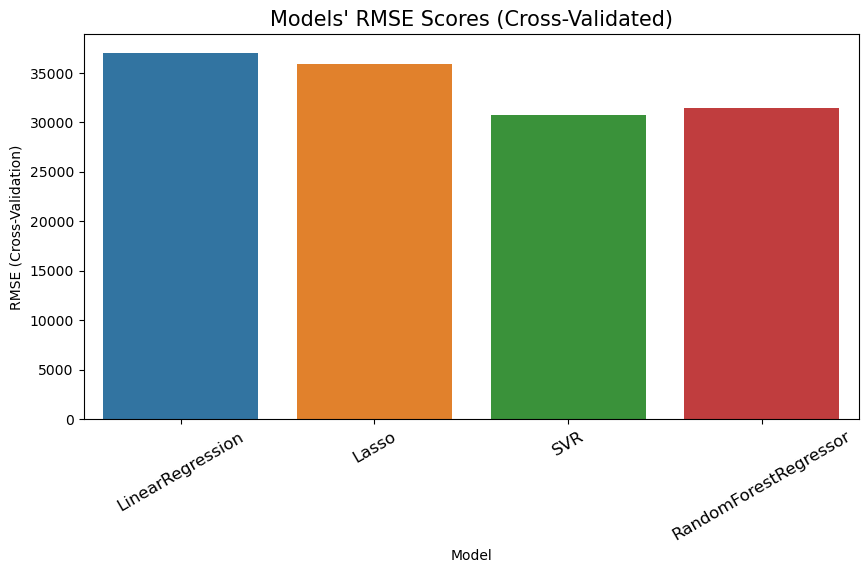

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()
